## Week 1 Introducing Data Analysis and Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

A = np.random.normal(loc=1, scale=10, size=(1000, 50))
mean = np.mean(A, axis=0)
std = np.std(A, axis=0)

A_norm = (A - mean)/std
scale(A)

array([[-1.60005939,  0.42142749,  0.50431381, ..., -0.07260638,
        -0.54568341,  0.01357861],
       [-1.22923093,  1.01326738,  0.89112964, ..., -0.51394094,
         0.48759733, -1.97859527],
       [-0.52252286, -0.18338941,  1.24265932, ..., -0.82522586,
         0.17815028,  1.79938257],
       ...,
       [-1.05836412, -2.07933206, -0.8801936 , ..., -1.24464328,
         1.58378954, -0.06852457],
       [ 1.92286166,  0.4628187 ,  2.41200403, ..., -0.34991092,
         2.49250976, -0.75509876],
       [ 0.89545123,  0.49659217, -0.69636812, ...,  0.12601432,
        -0.52224209,  0.78453116]])

In [849]:
np.mean(A_norm), np.std(A_norm)

(-2.4158453015843408e-18, 1.0)

In [135]:
Z = np.array([[4, 5, 0], 
             [1, 9, 3],              
             [5, 1, 1],
             [3, 3, 3], 
             [9, 9, 9], 
             [4, 7, 1]])

r = np.sum(Z, axis=1)
np.nonzero(r > 10)

(array([1, 4, 5]),)

In [860]:
Z = np.array([[1, 2, 300], 
             [4, 5, 600],              
             [7, 8, 900]])
scale(Z)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [ ]:
A = np.eye(3)
B = np.eye(3)
print(np.vstack((A, B)))

### Programming Assignment 1.1: Data preprocessing in Pandas

In [59]:
import pandas
data = pandas.read_csv('titanic.csv', index_col='PassengerId')

# link to titanic.csv: 
# https://d3c33hcgiwev3.cloudfront.net/_ea07570741a3ec966e284208f588e50e_titanic.csv?Expires=1631923200&Signature=Bz52pPUydkJaho~UJR3QJ8fH~BOYcx92TKrKOcrFWTnHhufXgfx2iA9VwJQgqucNeSIn~L1S2BlMhX1iy~eHH-m1RXqwSmmmLKxqdg1bNv~BOrqSZPnaPlhZBFGH~nMpXPW0jR7y~8xOjLIx~ZgGJScSg3xCMxjy3Y7XPvvQfg4_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A

In [484]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# How many men and women were on the ship?

ppl = dict(data['Sex'].value_counts())
for s in ppl:
    #print(f'{s}: {ppl[s]}', end =" ")
    print(ppl[s], end =" ")
    
# data['Sex'].value_counts(normalize=True)

577 314 

<AxesSubplot:>

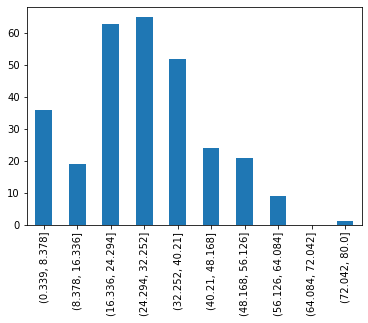

In [57]:
#for style in ['line','bar','barh','hist','box','kde','density','area','pie','scatter','hexbin']:
data[data['Survived'] == 1]['Age'].value_counts(bins=10, sort=False).plot(kind='bar')

In [36]:
# How many passengers survived? Calculate the percentage of surviving passengers.

part = data['Survived'].sum() / data['Survived'].count()
round(part * 100, 2)

#data['Survived'].value_counts(normalize=True)

38.38

In [500]:
# What is the proportion of first class passengers among all passengers?

part = len(data[data['Pclass'] == 1]) / data['Pclass'].count()
round(part * 100, 2)

# data['Pclass'].value_counts(normalize=True)

24.24

29.699 28.0


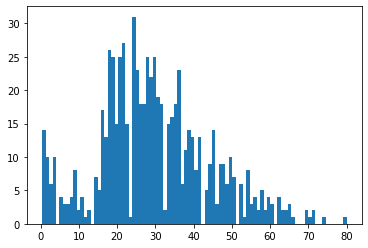

In [262]:
# How old were the passengers? Calculate the average and median age of the passengers.

#print(data[~data['Age'].isnull()]['Age'].mean())

mean = round(data['Age'].mean(), 3)
med = data['Age'].median()

print(f'{mean} {med}')

plt.hist(data['Age'], 88)
plt.show()

In [340]:
data['Age'].value_counts(bins=5)

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.339, 16.336]     100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [501]:
# Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? 
# Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

# Does the number of siblings / spouses correlate with the number of parents / children? 
# Calculate the Pearson correlation between the SibSp and Parch features.

data[['SibSp', 'Parch']].corr(method='pearson', min_periods=1)

# Correlation less than 0.5 (meaning the number of siblings correlates weakly with the number of parents / children)
# Корреляция меньше 0.5 (значит число братьев/сестер слабо коррелирует с числом родителей/детей)

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


In [485]:
# Какое самое популярное женское имя на корабле? 
# Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name).

# What's the most popular female name on a ship?
# Extract the passenger's First Name from the passenger's full name (Name column).

data['Name'].values

# a lot of women have names in brakcets, so I extract them into new column
# example: Rice, Mrs. William (Margaret Norton) where Margaret Norton is a woman name
data['FemaleName'] = data.Name.str.extract(r'\(([A-Za-z0-9_ ]+)\)', expand=True)

# split name after first comma into last and first names
data[['LastName', 'FirstName']] = data.Name.str.split(",", 1, expand=True)

# clear FirstName from titles 
titles = ['Mr.', 'Mrs.', 'Miss.']
for t in titles:
    data['FirstName'] = data.FirstName.str.replace(t, '', regex=False, case=True)

# clear FirstName from non-alphabetic characters
data['FirstName'] = data.FirstName.str.replace('[^a-zA-Z]', ' ', regex=True)
data['FirstName'] = data.FirstName.str.strip()

# fill in empty FemaleNames with FirstName (for those women who doesnt have name in brakcets) 
data['FemaleName'].fillna(data['FirstName'], inplace=True)

# extract women's first name to separate column 'FemaleFirstName'
# ordinary name: Sandstrom, Miss. Marguerite Rut
data[['FemaleFirstName', 'FemaleLastName']] = data.FemaleName.str.split(' ', 1, expand=True)

data[data['Sex'] == 'female']['FemaleFirstName'].value_counts()

Anna         15
Mary         14
Margaret     10
Elizabeth     9
Alice         6
             ..
Martin        1
Lucy          1
Johanna       1
Agda          1
Joan          1
Name: FemaleFirstName, Length: 183, dtype: int64

In [491]:
# how to drop column
# data = data.drop(['FemaleName'], axis=1)

# how to find string in column value
# data[(data['FemaleFirstName'].str.contains('Anna'))]

# create data frame from scratch
# df = pandas.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
# or
# data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
# pandas.DataFrame.from_dict(data)

In [509]:
data[data['Survived'] == 0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

### Programming Assignment 1.2: Decision trees. The features' importance

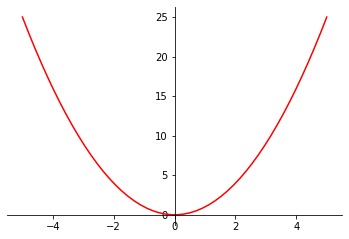

In [541]:
x = np.linspace(-5,5,50)
y = x**2 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y, 'r')
plt.show()

In [543]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])

clf = DecisionTreeClassifier()
clf.fit(X, y)

clf.feature_importances_

array([0.75, 0.25])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

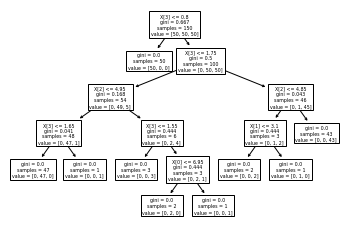

In [548]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
x, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

tree.plot_tree(clf)

In [555]:
newdf = pandas.DataFrame(iris.data)
newdf.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
import pandas
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

X = pandas.read_csv('titanic.csv', index_col='PassengerId')

# drop unnecessary columns and remove rows which contain missing values
X.drop(columns=['Name', 'Cabin', 'SibSp', 'Parch', 'Ticket', 'Embarked'], inplace=True)
X.dropna(inplace=True)
X.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

# extract 'Survived' feature to 'answers' dataset
y = X['Survived']
X.drop(columns=['Survived'], inplace=True)

y = y.replace([0, 1], ['Not Survived', 'Survived'])

In [817]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

clf.feature_importances_

array([0.14751816, 0.30051221, 0.25124241, 0.30072722])

In [862]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [796]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(clf, out_file=dotfile, feature_names=X.columns)
dotfile.close()

In [930]:
clf.predict([[3,1,20,14]])


array(['Survived'], dtype=object)

In [931]:
X = pandas.read_csv('titanic.csv', index_col='PassengerId')

# drop unnecessary columns and remove rows which contain missing values
X.drop(columns=['Name', 'Cabin', 'SibSp', 'Parch', 'Ticket', 'Embarked'], inplace=True)
X.dropna(inplace=True)

d = X[(X['Sex']=='female') & (X['Survived']==1)]

d['Age'].value_counts(bins=3)
d[d['Pclass']==3]['Fare'].value_counts(bins=3)

(7.199999999999999, 15.279]    32
(15.279, 23.333]               13
(23.333, 31.388]                2
Name: Fare, dtype: int64